In [ ]:
# ocr for cookbook
# iterate over all images in directory
# then, process each image


# testing
# start with one image



In [1]:
import pytesseract
import subprocess
import sys
import pyperclip
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from deskew import determine_skew
import math
from typing import Tuple, Union
from pytesseract import Output
import pytesseract


In [2]:
def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

In [11]:
images = [file for file in os.listdir() if file.endswith('.jpg')]
first_image = images[0]
print(first_image)

IMG_20201218_094601-0.jpg


True

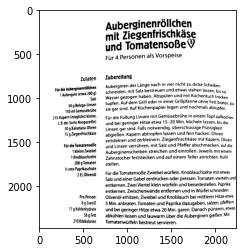

In [14]:
# get list of images in directory
# remove all not matching

images = [file for file in os.listdir() if file.endswith('.jpg')]
first_image = images[0]

# read in image
img = cv2.imread(first_image)
# convert to gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# transform image
kernel = np.ones((1,1))
img = cv2.dilate(img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)
img = cv2.GaussianBlur(img, (5,5), 0)
img = cv2.medianBlur(img,5)

# threshold image
ret,thresh1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')
#plt.imshow(thresh1, cmap='gray')
cv2.imwrite('threshold.jpg', thresh1)

# probably manual process the image
# then, deskew
#plt.imshow(gray)

True

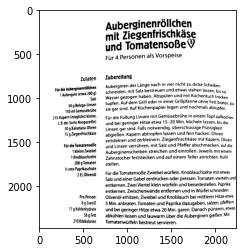

In [15]:
#
#cropped_img = cv2.imread('threshold.png')
#cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
cropped_img = thresh1
angle = determine_skew(cropped_img)
rotated = rotate(cropped_img, angle, (0, 0, 0))
plt.imshow(rotated, cmap='gray')
cv2.imwrite('cropped_img_deskew.png', rotated)

In [24]:
image = cv2.imread('cropped_img_deskew.png')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)
# images to text
# use bounding boxes in order to sort out text
# use regexp in order to bound boxes

Confidence: -1
Text: 

Confidence: -1
Text: 

Confidence: -1
Text: 

Confidence: -1
Text: 

Confidence: 74
Text: Zutaten

Confidence: -1
Text: 

Confidence: -1
Text: 

Confidence: -1
Text: 

Confidence: 41
Text: Fur

Confidence: 87
Text: die

Confidence: 80
Text: Auberginenrolichen

Confidence: -1
Text: 

Confidence: 88
Text: 1

Confidence: 88
Text: Aubergine

Confidence: 92
Text: (etwa

Confidence: 79
Text: 2009)

Confidence: -1
Text: 

Confidence: 89
Text: Salz

Confidence: -1
Text: 

Confidence: -1
Text: 

Confidence: -1
Text: 

Confidence: 93
Text: 50

Confidence: 93
Text: g

Confidence: 89
Text: Beluga-Linsen

Confidence: -1
Text: 

Confidence: -1
Text: 

Confidence: 93
Text: 150

Confidence: 34
Text: ml

Confidence: 0
Text: Gemusebriihe

Confidence: -1
Text: 

Confidence: -1
Text: 

Confidence: 68
Text: 2

Confidence: 68
Text: EL

Confidence: 89
Text: Kapern

Confidence: 80
Text: (moglichst

Confidence: 83
Text: kleine,

Confidence: -1
Text: 

Confidence: 48
Text: 2.B.

Confidenc

Confidence: 92
Text: Knoblauch

Confidence: 91
Text: bei

Confidence: 91
Text: mittlerer

Confidence: 93
Text: Hitze

Confidence: 93
Text: etwa

Confidence: -1
Text: 

Confidence: 92
Text: 5

Confidence: 91
Text: Min.

Confidence: 88
Text: anbraten.

Confidence: 88
Text: Tomaten

Confidence: 92
Text: und

Confidence: 92
Text: Paprika

Confidence: 91
Text: dazugeben,

Confidence: 90
Text: salzen,

Confidence: 84
Text: pfeffern

Confidence: -1
Text: 

Confidence: 88
Text: und

Confidence: 88
Text: bei

Confidence: 92
Text: geringer

Confidence: 92
Text: Hitze

Confidence: 91
Text: etwa

Confidence: 93
Text: 20

Confidence: 89
Text: Min.

Confidence: 92
Text: garen.

Confidence: 91
Text: Danach

Confidence: 70
Text: piirieren,

Confidence: 90
Text: etwas

Confidence: -1
Text: 

Confidence: 75
Text: abkiihlen

Confidence: 88
Text: lassen

Confidence: 92
Text: und

Confidence: 91
Text: lauwarm

Confidence: 0
Text: uber

Confidence: 93
Text: die

Confidence: 93
Text: Auberginen

Confidence: 

-1

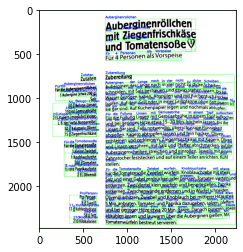

In [22]:
# loop over each of the individual text localizations
for i in range(0, len(results["text"])):
	# extract the bounding box coordinates of the text region from
	# the current result
	x = results["left"][i]
	y = results["top"][i]
	w = results["width"][i]
	h = results["height"][i]
	# extract the OCR text itself along with the confidence of the
	# text localization
	text = results["text"][i]
	conf = int(results["conf"][i])
    # filter out weak confidence text localizations
	#if conf > 80:
	# display the confidence and text to our terminal
	print("Confidence: {}".format(conf))
	print("Text: {}".format(text))
	print("")
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV, then draw a bounding box around the text along
	# with the text itself
	text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)
# show the output image
plt.imshow(image)
#cv2.imshow("Image", image)
cv2.waitKey(0)

In [23]:
cv2.imwrite('selected_text.jpg', image)

True

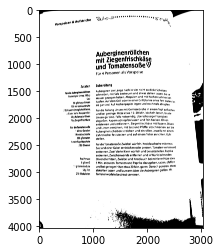

In [5]:
plt.imshow(image)

In [ ]:
#subprocess.call('export TESSDATA_PREFIX=/usr/share/tessdata')
# iterate over all images within the directory
    grayscale_image  = lambda image : cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threshold_image = lambda image : cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    
    get_language = lambda : subprocess.check_output('cat ' + ocr_file_loc + ' ; exit 0', stderr=subprocess.STDOUT, shell=True).decode(sys.getdefaultencoding()).strip()

    try:
        p = subprocess.Popen('maim -s -u'.split() + [screenshot_location])
        p.wait()
    except:
        return

    dest_lang = get_language()
    
    
    text = pytesseract.image_to_string(
        threshold_image(
            grayscale_image(
                cv2.imread(screenshot_location))),
        lang=dest_lang)

    if 'jpn' in dest_lang:
        text = text.replace(' ', '')
    
    pyperclip.copy(text)